In [17]:
%%writefile ../python/squaregraphs.py

import numpy.random as r
from numpy.linalg import norm
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import json as js

# Ufunc are a way to vectorize python functions so that they execute efficiently on numpy arrays.
def _diff(x,y):
    return (x-y)**2

ufunc_diff = np.frompyfunc(_diff,2,1)
ufunc_sqrt=np.frompyfunc(lambda a:np.sqrt(a),1,1)

def unifSample(n=1000,scale=1.):
    """Generate a uniform sample from the square"""
    X=r.uniform(size=[n,2])
    X[:,0]=scale*X[:,0]
    return X

def epsilonNet(n=100,epsilon=0.1,scale=1):
    """Generate an epsilon net that covers all but about 1/n of the square"""
    X=r.uniform(size=[1,2])
    X[:,0]=scale*X[:,0]
    while True:
        Z=r.uniform(size=[n,2])
        Z[:,0]=scale*Z[:,0]
        D1=ufunc_diff.outer(X[:,0],Z[:,0])
        D2=ufunc_diff.outer(X[:,1],Z[:,1])
        D=D1+D2
        _Dist=ufunc_sqrt(D) # compute matrix where entry i,j is the distance between center i and candidate j
        #print(_Dist.shape)
        min_dist=np.min(_Dist,axis=0)  # compute distance of each candidate to nearest center in X
        #print(min_dist.shape)
        d_max=np.max(min_dist)
        print('\r centers=%d, d_max= %5.3f, epsilon=%5.3f'%(X.shape[0],d_max,epsilon),end='')
        if d_max<epsilon:
            break
        else:
            i_max=np.argmax(min_dist)
            X=np.append(X,Z[i_max:i_max+1,:],axis=0) # accumulate furthest center
    return X

def Compute_edges(X,max_dist=0.2):
    """Compute the edges whose length is smaller than max_dist"""

    D1=ufunc_diff.outer(X[:,0],X[:,0])
    D2=ufunc_diff.outer(X[:,1],X[:,1])
    D=D1+D2
    _Dist=ufunc_sqrt(D)
    _Small = _Dist<max_dist

    pairs=np.nonzero(_Small)
    new_pairs=[[],[]]
    segments=[]
    for i in range(len(pairs[0])):
        c0=pairs[0][i]
        c1=pairs[1][i]
        if c0>c1:
            new_pairs[0].append(c0)
            new_pairs[1].append(c1)
            segment=[tuple(X[c0,:]),tuple(X[c1,:])]
            segments.append(segment)
    new_pairs=[np.array(new_pairs[0]),np.array(new_pairs[1])]
    print('pairs:%d,new_pairs:%d'%(pairs[0].shape[0],new_pairs[0].shape[0]))
    return segments,new_pairs

def plot_graph(X,segments):
    lc = mc.LineCollection(segments, colors='r', linewidths=0.1)
    _min=np.min(X[:,0])
    _max=np.max(X[:,0])
    fig, ax = pl.subplots(figsize=[12*(_max-_min),12])
    ax.plot(X[:,0],X[:,1],'.');
    ax.add_collection(lc)
    #ax.set_xlim([0,1])
    
def graph2json(X,pairs):
    vertices=[{'id':'%d'%i} for i in range(X.shape[0])]
    edges=[]
    for i in range(pairs[0].shape[0]):
        i1=pairs[0][i]
        i2=pairs[1][i]
        if i1<=i2:
            continue
        p1=X[i1,:]
        p2=X[i2,:]
        dist = norm(p1-p2)
        edges.append({"source":'%d'%i1, "target":'%d'%i2, "weight":1.0, "dist":'%5.2f'%dist})

    Dict={'directed':False,
          'nodes':vertices,
          "edges":edges}
    return Dict

#_type="uniform"
_type='epsilonCover'
n=1000
m=100
epsilon=0.03
max_dist=0.1
scale=1/3.

if _type=="uniform":
    X=unifSample(n=n,scale=scale)
    filename='Sample_n=%d_max_dist=%5.2f'%(n,max_dist)
elif _type=='epsilonCover':
    X=epsilonNet(n=m,epsilon=epsilon,scale=scale)
    filename='Net_m=%d_epsilon=%5.2f_max_dist=%5.2f'%(m,epsilon,max_dist)
else:
    Print('unrecognized type:',_type)
    
filename = 'graph_jsons/'+filename+'.json'
segments,pairs= Compute_edges(X,max_dist)
plot_graph(X,segments)
D=graph2json(X,pairs)

with open(filename, 'w') as json_file:
    js.dump(D,json_file)
    print('\n done with '+filename)

Overwriting ../python/squaregraphs.py


In [5]:
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np


<IPython.core.display.Javascript object>


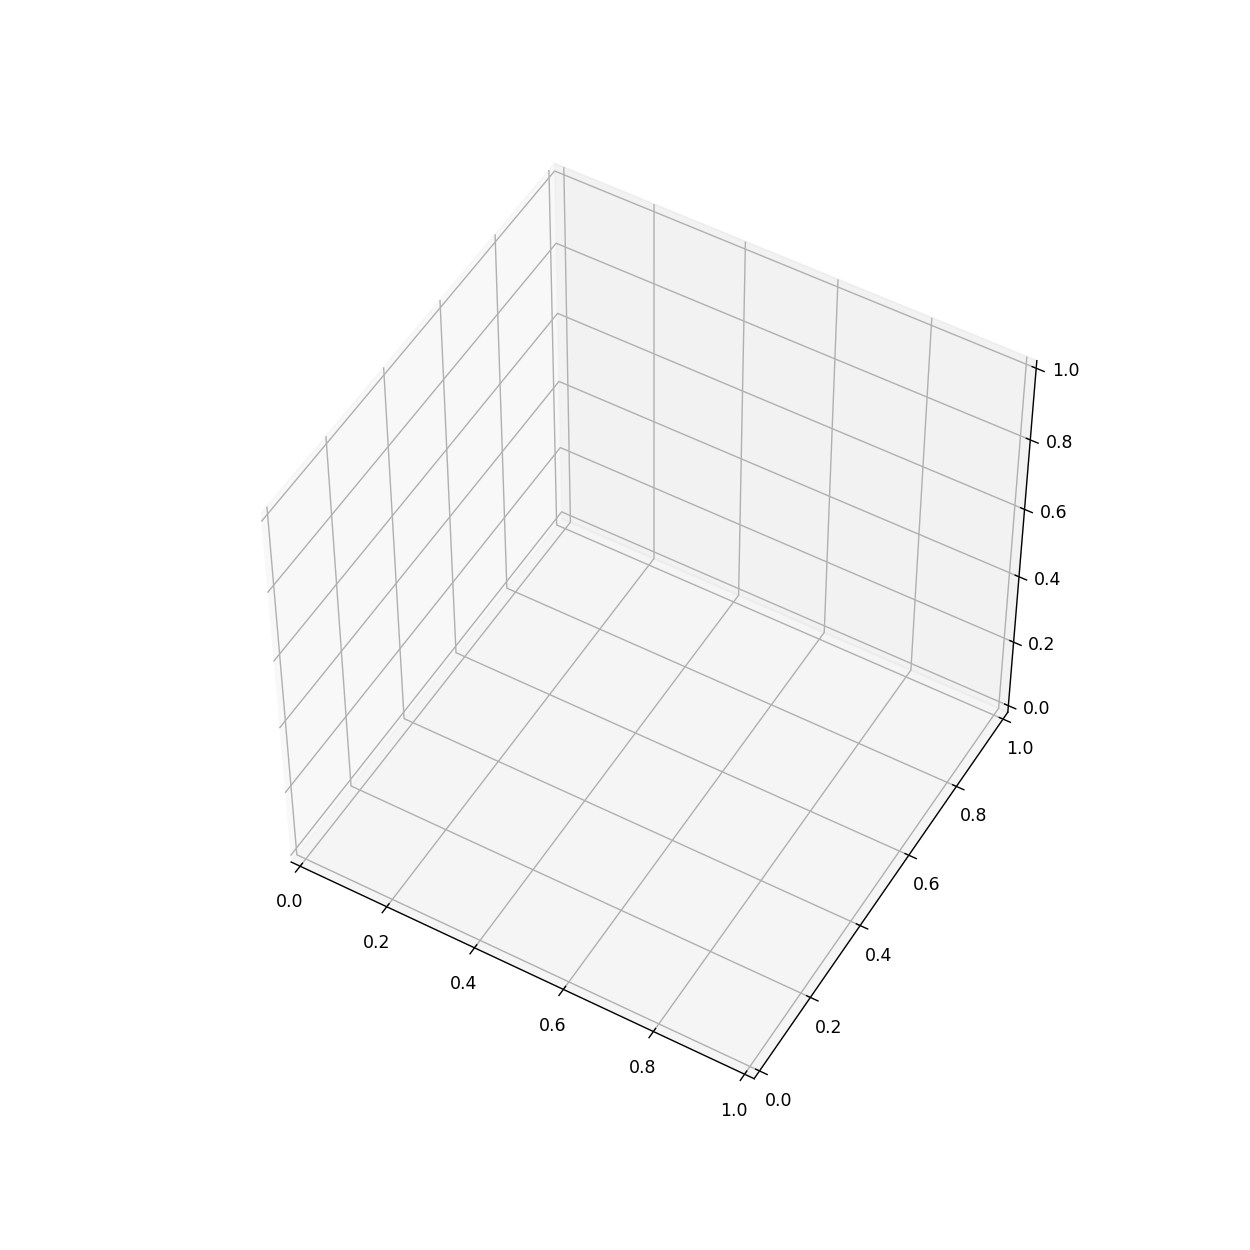

NameError: name 'theta' is not defined

In [6]:

fig = plot.figure(figsize=[10,10]);
ax = fig.gca(projection = '3d')
#ax.set_proj_type('ortho')
#ax.set_aspect('equal', adjustable='datalim', anchor='C')
#ax.autoscale()
X = [theta,x,y]
points = np.array([X[0], X[1], X[2]]).T.reshape(-1, 1, 3)
#r = [(1.0, 1.0, 1.0, 1.0), (1.0, 0.75, 0.75, 1.0), (1.0, 0.5, 0.5, 1.0), (1.0, 0.25, 0.25, 1.0), (1.0, 0.0, 0.0, 1.0)];

segs = np.concatenate([points[:-1], points[1:]], axis = 1)
ax.add_collection(Line3DCollection(segs))

plot.show()

<IPython.core.display.Javascript object>


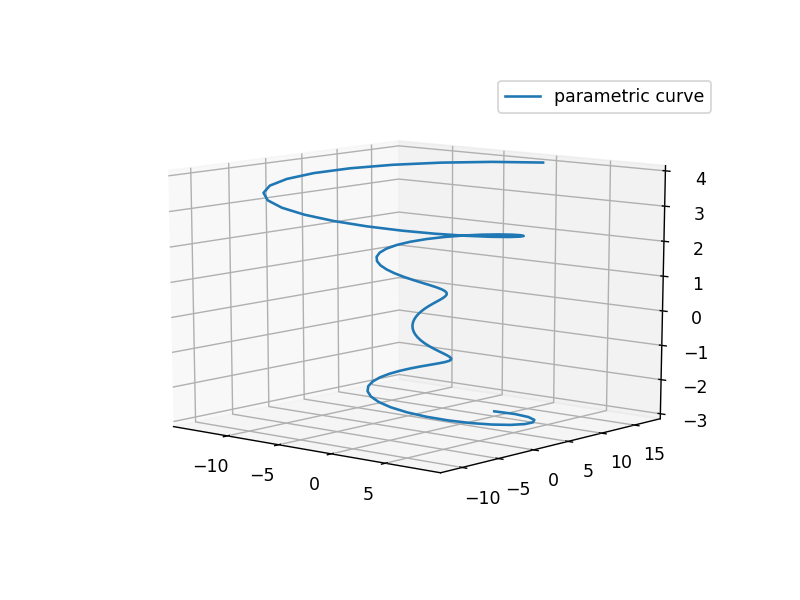

In [7]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-3, 4, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


In [ ]:
type(ax)

In [ ]:
X.shape

<IPython.core.display.Javascript object>


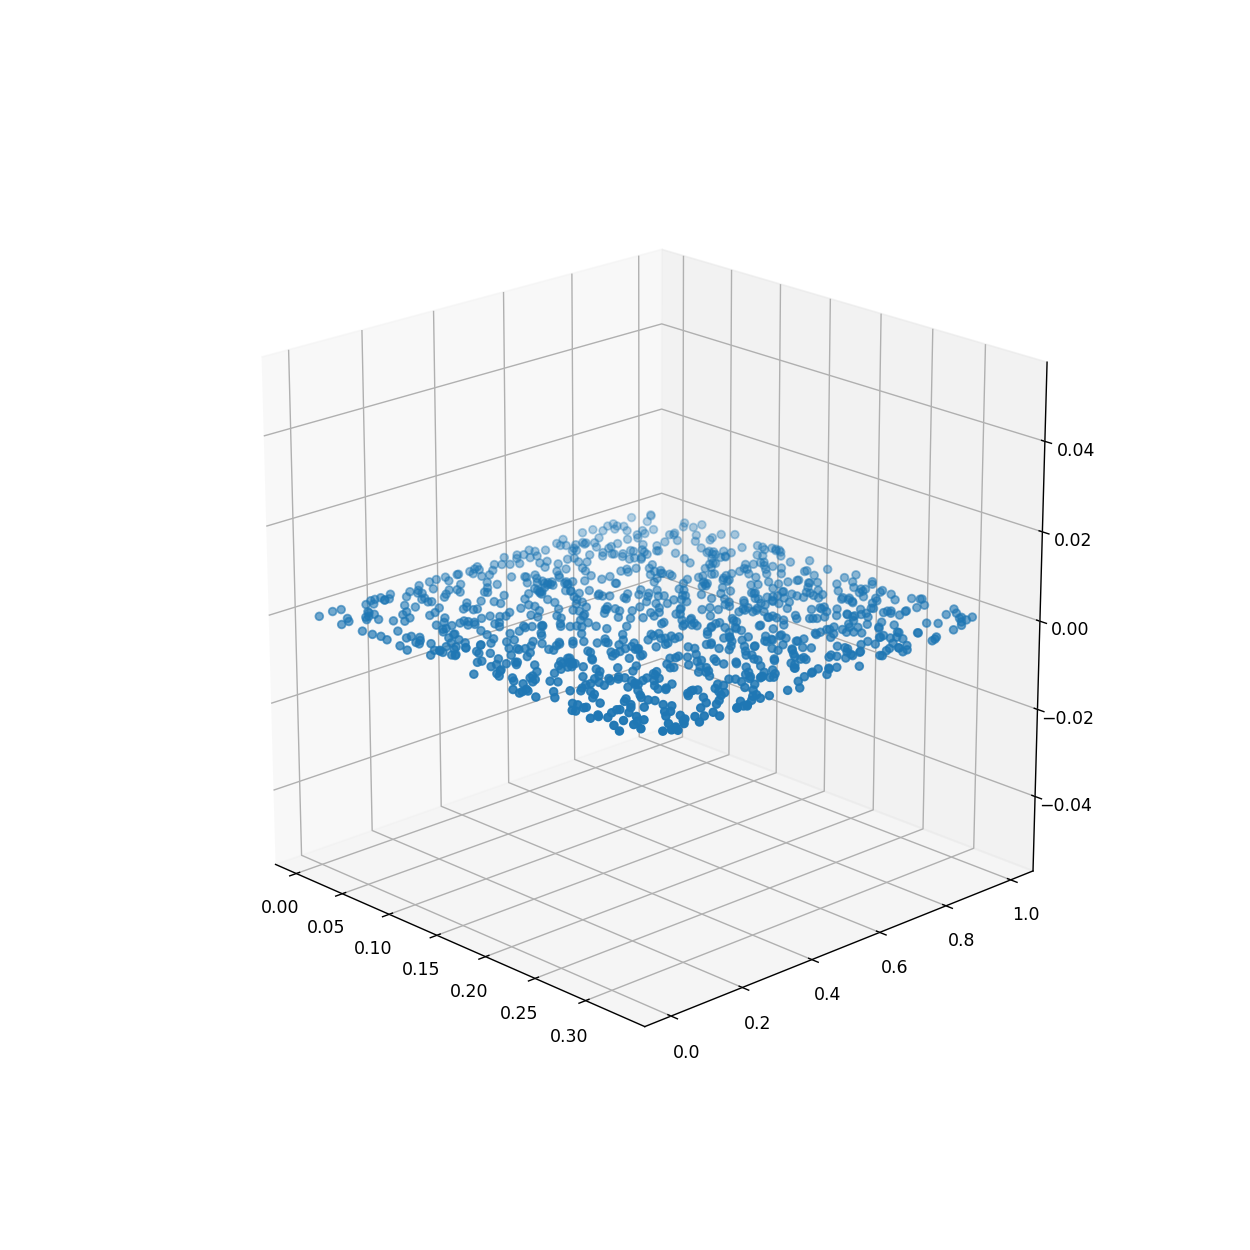

In [8]:
x=X[:,0]
y=X[:,1]

fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
ax.scatter(x,y,0)

In [15]:
X.shape

(186, 2)

<IPython.core.display.Javascript object>


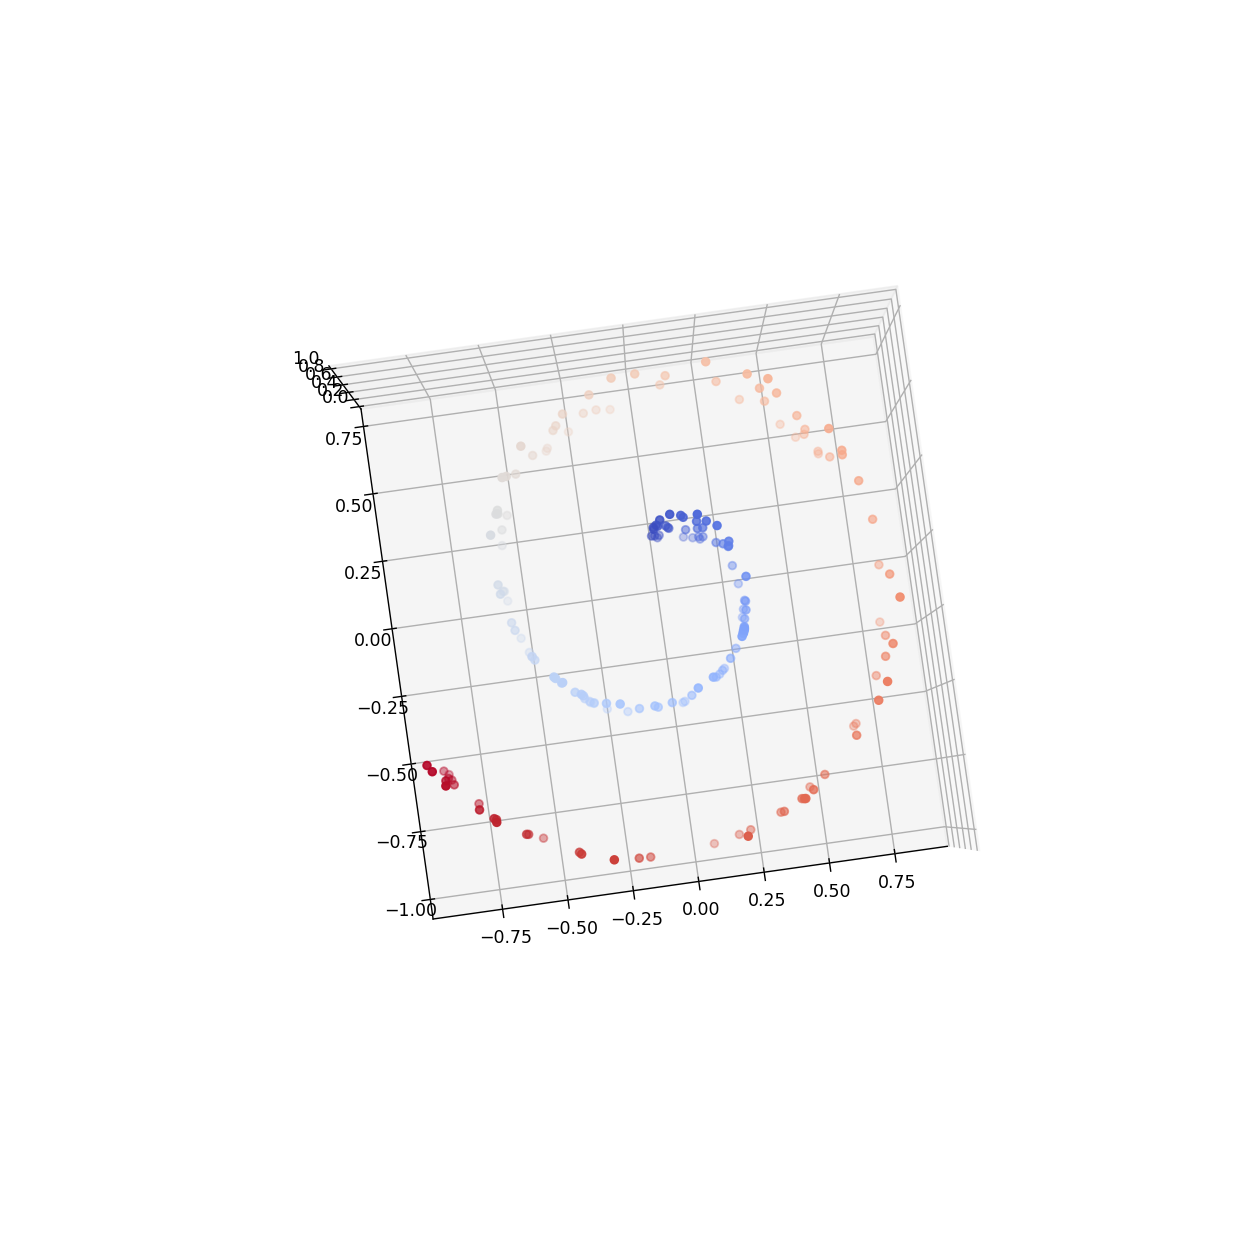

In [16]:
from matplotlib import cm
theta=X[:,0]*10*np.pi
x=np.sin(theta)*(theta+2)/12.
y=np.cos(theta)*(theta+2)/12.
theta/=np.max(theta)
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
ax.scatter(x,y,X[:,1],c=theta,cmap=cm.coolwarm,vmin=np.min(theta),vmax=np.max(theta))

In [ ]:
plot_graph(X,segments)

<IPython.core.display.Javascript object>


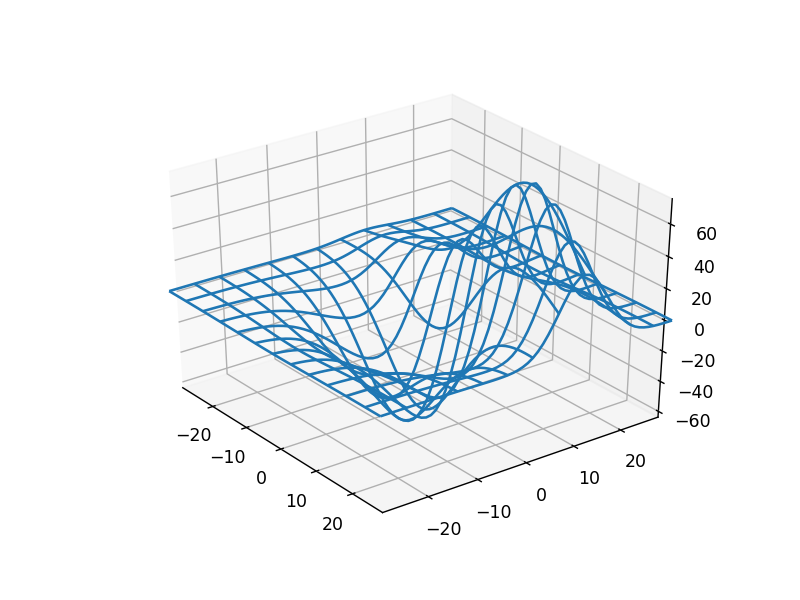

In [1]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)